# Urban Datasets

In [1]:
import numpy as np
import pandas as pd

np.random.seed(2024)

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

from TopoTree import TopoTree, plot_hierarchical_treemap
from TopoMap import TopoMap
from HierarchicalTopoMap import HierarchicalTopoMap, HierarchicalTopoMap2

In [2]:
colorbewer = {3: ['#377eb8','#e41a1c','#4daf4a'],
              4: ['#377eb8','#e41a1c','#4daf4a','#984ea3'],
              5: ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00'],
              6: ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00','#ffff33'],
              7: ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628'],
              8: ['#377eb8','#e41a1c','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf']}

In [3]:
def plot_topomap_comparison(proj_original, proj_new,
                            df, y_column, hiertopomap=None):
    colors = [px.colors.qualitative.D3[i] for i in range(10)]
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    for i, cluster in enumerate(df[y_column].unique()):
        i_cluster = list(df[df[y_column]==cluster].index)
        axs[0].scatter(proj_original[i_cluster,0], proj_original[i_cluster,1],
                        c=colors[i], s=5)
        
        axs[1].scatter(proj_new[i_cluster,0], proj_new[i_cluster,1],
                        c=colors[i], s=5)
        
    if not hiertopomap is None:
        hulls = hiertopomap.get_components_hull()
        for j, sub in enumerate(hiertopomap.subsets):
            if len(sub) > 10:
                comp_ids = list(hiertopomap.subsets[j])
                points_ids = [comp_ids[i] for i in hulls[j].vertices]
                points = hiertopomap.projections[points_ids,:]
                
                axs[1].fill(points[:,0], points[:,1], 'k', alpha=0.2)
                points = list(points)
                points.append(points[0])
                xs, ys = zip(*points)
                axs[1].plot(xs, ys, linestyle='dashed', color='grey')

            
    axs[0].set_title('Original Projection - TopoMap')
    axs[1].set_title('New Projection - HierarchicalTopoMap')

    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    fig.suptitle('Comparison of projections')
    plt.tight_layout()

    return fig


def plot_topomap_comparison_plotly(proj_original, proj_new,
                                  hiertopomap=None):
    
    fig = make_subplots(rows=1, cols=2,
                        specs=[[{'type': 'xy'},
                                {'type': 'xy'}]],
                        subplot_titles=('Original Projection - TopoMap',
                                        'New Projection - Hierarchical TopoMap'))
    
    fig.add_trace(
        go.Scatter(x=proj_original[:,0], 
                   y=proj_original[:,1],
                   mode='markers',
                   opacity=0.5,
                   marker=dict(
                    color='Blue',
                    size=5,
                   )
                   ),
        row=1, col=1
    )

    if not hiertopomap is None:
        hulls = hiertopomap.get_components_hull()
        for j, sub in enumerate(hiertopomap.subsets):
            if len(sub) > 10:
                comp_ids = list(hiertopomap.subsets[j])
                points_ids = [comp_ids[i] for i in hulls[j].vertices]
                points = list(hiertopomap.projections[points_ids,:])
                points.append(points[0])
                xs, ys = zip(*points)

                fig.add_trace(go.Scatter(x=xs, y=ys,
                                fill='toself', fillcolor = 'rgba(255, 252, 187, 0.5)',
                                line_color='rgb(255, 252, 187)',
                                text=f'Component {j}'
                                ),
                            row=1, col=2)
                
    fig.add_trace(
        go.Scatter(x=proj_new[:,0], 
                   y=proj_new[:,1],
                   mode='markers',
                   opacity=0.5,
                   marker=dict(
                    color='Blue',
                    size=5,
                   )
                   ),
        row=1, col=2
    )

    fig.update_layout(showlegend=False,
                      margin = dict(t=50, l=25, r=25, b=25),
                      height=600,
                      width=1000)

    return fig

def plot_topomap_comparison_plotly_highlight(proj_original, proj_new, 
                                             components_to_highligth, df_comp,
                                            hiertopomap=None):
    

    highligth = np.zeros(shape=proj_original.shape[0])

    for i, comp in enumerate(components_to_highligth):
        highligth[df_comp.loc[comp]['points']] = i+1
    
    fig = make_subplots(rows=1, cols=2,
                        specs=[[{'type': 'xy'},
                                {'type': 'xy'}]],
                        subplot_titles=('Original Projection - TopoMap',
                                        'New Projection - Hierarchical TopoMap'),
                        horizontal_spacing = 0.02)
    
    #colors = px.colors.qualitative.Plotly
    colors = colorbewer[len(np.unique(highligth))]

    for i in range(len(np.unique(highligth))):
        if i==0:
            name = 'Other points'
        else:
            name = f'Component {components_to_highligth[i-1]}'

        fig.add_trace(
            go.Scatter(x=proj_original[highligth==i,0], 
                    y=proj_original[highligth==i,1],
                    mode='markers',
                    #opacity=0.5,
                    marker=dict(
                        color=colors[i],
                        size=3,
                    ),
                    name=name,
                    legendgroup=name
                    ),
            row=1, col=1
        )

    if not hiertopomap is None:
        hulls = hiertopomap.get_components_hull()
        for j, sub in enumerate(hiertopomap.subsets):
            if len(sub) > 10:
                comp_ids = list(hiertopomap.subsets[j])
                points_ids = [comp_ids[i] for i in hulls[j].vertices]
                points = list(hiertopomap.projections[points_ids,:])
                points.append(points[0])
                xs, ys = zip(*points)

                fig.add_trace(go.Scatter(x=xs, y=ys,
                                fill='toself', fillcolor = 'rgba(169,169,169, 0.7)',
                                line_color='rgb(128,128,128)',
                                line_width=1,
                                text=f'Component {j}',
                                name='Components', legendgroup='Components',
                                showlegend=False,
                                ),
                            row=1, col=2)

    fig.update_layout(margin = dict(t=75, l=25, r=25, b=25),
                      height=600,
                      width=1000,
                      #showlegend=False
                      )
                
    for i in range(len(np.unique(highligth))):
        if i==0:
            name = 'Other points'
        else:
            name = f'Component {components_to_highligth[i-1]}'

        fig.add_trace(
            go.Scatter(x=proj_new[highligth==i,0], 
                    y=proj_new[highligth==i,1],
                    mode='markers',
                    #opacity=0.5,
                    marker=dict(
                        color=colors[i],
                        size=3,
                    ),
                    name=name,
                    legendgroup=name,
                    showlegend=False
                    ),
            row=1, col=2
        )


    return fig

## Times Square

In [4]:
place = 'TimesSquare'

X_times = np.loadtxt(f'data/topomap-data/{place}.txt',
                     delimiter=",")
X_times.shape

(17520, 6)

In [5]:
topomap_times = TopoMap(X_times)

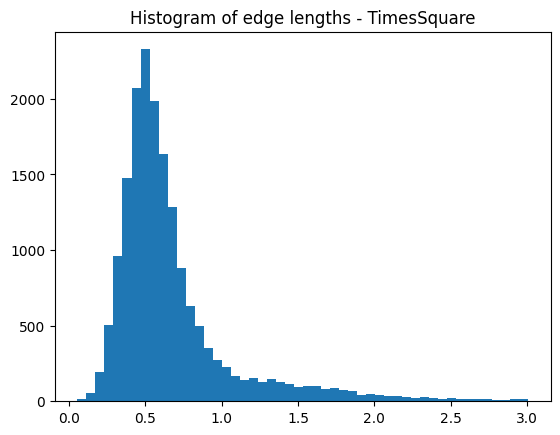

In [6]:
edge_lengths = []

for edge in topomap_times.sorted_edges:
    edge_lengths.append(edge[2]['weight'])

plt.hist(edge_lengths[:17400], bins=50) # There are some edges that I way longer
plt.title('Histogram of edge lengths - TimesSquare')
plt.show()

In [7]:
percent_times = np.percentile(edge_lengths, 40)
percent_times

0.5111643342453797

In [8]:
proj_topomap_times = topomap_times.run()

In [9]:
hiertopomap_times = HierarchicalTopoMap(X_times, max_dist=percent_times, min_points_component=0.001*X_times.shape[0])
proj_hier_times = hiertopomap_times.run()

[INFO] Min distance hit. Distance: 0.5112661728250089 | Max_dist: 0.5111643342453797
Max_density: 1.218
Scalling component 104 - Density: 0.913 - Alpha: 19.260... scaling - initial area: 542.403...done - final area: 201212.234.
Scalling component 229 - Density: 1.364 - Alpha: 11.736... scaling - initial area: 90.197...done - final area: 12423.794.
Scalling component 231 - Density: 1.293 - Alpha: 14.680... scaling - initial area: 157.032...done - final area: 33840.445.
Scalling component 232 - Density: 2.480 - Alpha: 10.962... scaling - initial area: 23.789...done - final area: 2858.565.
Scalling component 258 - Density: 1.346 - Alpha: 16.653... scaling - initial area: 186.547...done - final area: 51735.832.
Scalling component 301 - Density: 1.040 - Alpha: 13.924... scaling - initial area: 218.254...done - final area: 42315.133.
Scalling component 324 - Density: 3.118 - Alpha: 8.764... scaling - initial area: 9.622...done - final area: 739.071.
Scalling component 385 - Density: 1.142 - 

In [10]:
topotree_times = TopoTree(X_times, min_box_size=0.01*X_times.shape[0])
comp_info_times = topotree_times.get_components()

df_comp_times = pd.DataFrame.from_dict(comp_info_times)

df_comp_times.head()

,id,points,size,persistence,created_at,children,parent,died_at
0,0,"[5632, 9729, 4609, 14855, 10760, 9743, 10768, ...",228,0.018351,0.493816,15,11.0,0.512167
1,1,"[14851, 10247, 14856, 5129, 6667, 4622, 3598, ...",247,0.007803,0.496059,10,5.0,0.503862
2,2,"[6145, 4100, 12297, 3594, 4621, 11278, 14351, ...",203,0.005125,0.498737,7,5.0,0.503862
3,3,"[13318, 2056, 5641, 11274, 14347, 15886, 10255...",334,0.010430,0.501738,13,11.0,0.512167
4,4,"[13824, 5633, 2566, 4102, 11279, 10256, 6162, ...",303,0.033288,0.502811,24,17.0,0.536098


In [11]:
fig = plot_hierarchical_treemap(df_comp_times, color='created_at')
fig.update_layout(title='TopoTree - Times Square Dataset',
                  width=1000)
fig.show()

In [12]:
components_to_highligth = [30,29]

fig = plot_topomap_comparison_plotly_highlight(proj_topomap_times, proj_hier_times, 
                                               components_to_highligth, df_comp_times,
                                               hiertopomap_times)
fig.update_layout(height=600, width=1200, title='Times Square Dataset', 
                  legend= {'itemsizing': 'constant'},
                  xaxis=dict(range=[-400, 800],showticklabels=True), 
                  yaxis=dict(range=[20400,21600],showticklabels=True),
                  xaxis2=dict(range=[-1000, 1100],showticklabels=False), 
                  yaxis2=dict(range=[20000,22600],showticklabels=False))
fig.show()